<a href="https://colab.research.google.com/github/Aiyaar19/Data-Science_CodSoft/blob/main/Movie_Rating_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (15509, 10)

Columns:
 Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

First 5 rows:
                                  Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita

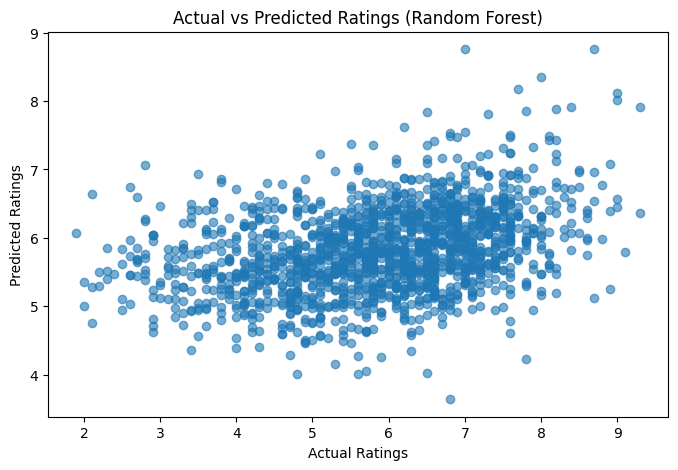

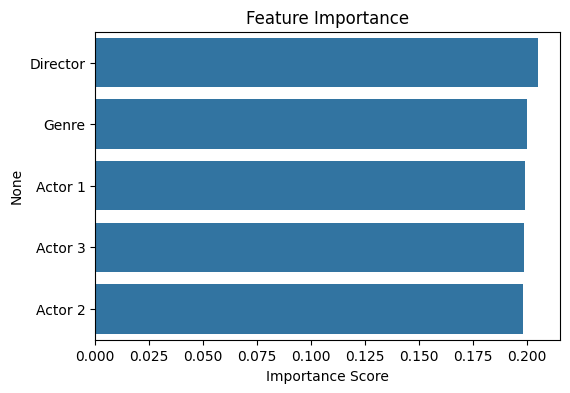


Model training and evaluation complete!


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("IMDb Movies India.csv", encoding='latin-1')

print("Dataset shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nFirst 5 rows:\n", df.head())
print("\nInfo:\n")
df.info()
print("\nMissing values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())

df = df.dropna(subset=['Rating'])
df.fillna('Unknown', inplace=True)
features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
target = 'Rating'
for f in features:
    if f not in df.columns:
        print(f"Column '{f}' not found in dataset.")

data = df[features + [target]].copy()

le = LabelEncoder()
for col in features:
    data[col] = le.fit_transform(data[col])

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name} Results:")
    print(f"MAE  : {mae:.3f}")
    print(f"RMSE : {rmse:.3f}")
    print(f"R²   : {r2:.3f}")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings (Random Forest)")
plt.show()

importances = rf_model.feature_importances_
feature_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()

print("\nModel training and evaluation complete!")